# Import Data

In [15]:
import pandas as pd
import numpy as np

# df = pd.read_csv('../data/hotel_bookings.csv')
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [16]:
features = pd.read_csv('../data/feature_description.csv', header=None)
features.columns = ['feature', 'description']

# Cleaning, Exploration and Basic Feature Engineering

Task alread done, see `part1.ipynb` if needed.

# Preparation

Check features:

In [17]:
pd.set_option("display.max_colwidth", 200)
pd.merge(features, train.describe().T, left_on='feature', right_index=True, how="right")

,feature,description,count,mean,std,min,25%,50%,75%,max
1,is_canceled,order canceled (1) or not (0),95512.0,0.370414,0.482918,0.00,0.0000,0.0,1.0,1.0
2,lead_time,Number of days that elapsed between the entering date of the booking into the PMS and the arrival date,95512.0,104.151583,106.821437,0.00,18.0000,69.0,160.0,737.0
5,arrival_date_week_number,Week number of year for arrival date,95512.0,27.171047,13.593740,1.00,16.0000,28.0,38.0,53.0
6,arrival_date_day_of_month,Day of arrival date,95512.0,15.797041,8.785365,1.00,8.0000,16.0,23.0,31.0
7,stays_in_weekend_nights,Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel,95512.0,0.927852,0.997446,0.00,0.0000,1.0,2.0,19.0
8,stays_in_week_nights,Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel,95512.0,2.500806,1.905649,0.00,1.0000,2.0,3.0,50.0
9,adults,Number of adults,95512.0,1.856866,0.594198,0.00,2.0000,2.0,2.0,55.0
10,children,Number of children,95512.0,0.104175,0.399210,0.00,0.0000,0.0,0.0,10.0
11,babies,Number of babies,95512.0,0.008020,0.094440,0.00,0.0000,0.0,0.0,9.0
16,is_repeated_guest,Value indicating if the booking name was from a repeated guest (1) or not (0),95512.0,0.031640,0.175041,0.00,0.0000,0.0,0.0,1.0


Define measurement level:

In [18]:

# features = features.set_index('feature')
# features.reindex(categoricals, axis=0)

## 🛑 TODO: RECODING NEEDED
Use plain integer to encode categrical features according to [official documentation](https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html) and explicit explanation in sector [Parameters](https://lightgbm.readthedocs.io/en/latest/Parameters.html#categorical_feature).

In [21]:
df[categoricals]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type
0,City Hotel,July,SC,PRT,Offline TA/TO,TA/TO,E,E,No Deposit,19,0,Transient
1,City Hotel,May,BB,PRT,Offline TA/TO,TA/TO,A,A,Non Refund,6,0,Transient
2,City Hotel,June,BB,FRA,Online TA,TA/TO,D,D,No Deposit,9,0,Transient
3,City Hotel,August,HB,PRT,Offline TA/TO,TA/TO,A,A,Non Refund,6,0,Transient-Party
4,Resort Hotel,June,HB,PRT,Direct,Direct,E,E,No Deposit,250,0,Transient
...,...,...,...,...,...,...,...,...,...,...,...,...
23873,City Hotel,May,BB,IRL,Direct,Direct,A,A,No Deposit,14,0,Transient
23874,City Hotel,April,BB,NLD,Online TA,TA/TO,D,D,No Deposit,9,0,Transient
23875,City Hotel,August,HB,PRT,Groups,TA/TO,A,A,No Deposit,19,0,Transient-Party
23876,Resort Hotel,July,BB,ESP,Online TA,TA/TO,D,D,No Deposit,240,0,Transient


In [32]:
from sklearn.preprocessing import LabelEncoder

categoricals = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
#     'reservation_status',
#     'reservation_status_date'
]

df = train.append(test) # construct a full dataframe for consistent encoding
df = df.fillna('0')
df['children'] = df['children'].astype(int) # type convertting

df_cat_tmp = df[categoricals].astype(str).apply(LabelEncoder().fit_transform) # encode cat columns
# df_encoded = pd.merge(df.drop(categoricals, axis=1), df_cat_tmp, left_index=True, right_index=True) # merge numeric and encoded cat columns

df[categoricals] = df_cat_tmp[categoricals].astype(int) # merge numeric and encoded cat columns

train_encoded = df.iloc[:len(train)]
test_encoded = df.iloc[len(train):]

In [43]:
train.head().T.tail(6)

,0,1,2,3,4
days_in_waiting_list,0,111,0,0,0
customer_type,Transient,Transient,Transient,Transient-Party,Transient
adr,0,100,157.5,101.5,223
required_car_parking_spaces,0,0,0,0,0
total_of_special_requests,0,0,2,0,0
is_canceled,1,1,0,1,1


In [44]:
train_encoded.head().T.tail(6)

,0,1,2,3,4
days_in_waiting_list,0.0,111.0,0.0,0.0,0.0
customer_type,2.0,2.0,2.0,3.0,2.0
adr,0.0,100.0,157.5,101.5,223.0
required_car_parking_spaces,0.0,0.0,0.0,0.0,0.0
total_of_special_requests,0.0,0.0,2.0,0.0,0.0
is_canceled,1.0,1.0,0.0,1.0,1.0


In [45]:
target = 'is_canceled' # splitting features and target
X_train, X_test = train_encoded.drop(target, axis=1), test_encoded.drop(target, axis=1)
y_train, y_test = train_encoded[target], test_encoded[target]

# Modelling

## 1. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = X_train.columns
X_train = X_train[feat_labels]
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 30, n_jobs = -1, 
                               random_state = 0, bootstrap = True)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Train(accuracy): 0.99428
Test(accuracy): 0.89392

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15033
           1       0.89      0.82      0.85      8845

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878



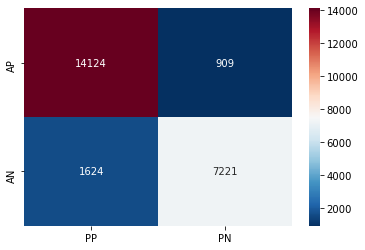

In [47]:
from sklearn import metrics
import seaborn as sns

y_pred = forest.predict(X_test)
print(f'Train(accuracy): {forest.score(X_train, y_train).round(5)}')
print(f'Test(accuracy): {forest.score(X_test, y_test).round(5)}\n')
print(metrics.classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test, y_pred), columns=['PP', 'PN'], index=['AP', 'AN'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdBu_r') # visualize confusion matrix with seaborn heatmap

In [55]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
     print("%2d) %-*s %f" % (f + 1, 30, 
                             feat_labels[f], 
                             importances[indices[f]]))

 1) hotel                          0.125453
 2) lead_time                      0.120981
 3) arrival_date_month             0.115618
 4) arrival_date_week_number       0.075291
 5) arrival_date_day_of_month      0.060582
 6) stays_in_weekend_nights        0.059160
 7) stays_in_week_nights           0.051972
 8) adults                         0.050505
 9) children                       0.045288
10) babies                         0.035367
11) meal                           0.033844
12) country                        0.028875
13) market_segment                 0.026029
14) distribution_channel           0.025481
15) is_repeated_guest              0.023461
16) previous_cancellations         0.021283
17) previous_bookings_not_canceled 0.021188
18) reserved_room_type             0.015050
19) assigned_room_type             0.012430
20) booking_changes                0.012206
21) deposit_type                   0.010365
22) agent                          0.009766
23) company                     

## 2. LightGBM

Construct a simple lightgbm model:

## 🛑 TODO: categorical features definition

In [49]:
# !pip install lightgbm # if not installed

In [50]:
import lightgbm as lgbm
import numpy as np
from sklearn import model_selection
lgbmclf = lgbm.LGBMClassifier()
lgbmclf.fit(X_train, y_train, categorical_feature=categoricals)
#clf.fit(X_train, y_train)

C:\Users\oyrx\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['agent', 'arrival_date_month', 'assigned_room_type', 'company', 'country', 'customer_type', 'deposit_type', 'distribution_channel', 'hotel', 'market_segment', 'meal', 'reserved_room_type']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Train(accuracy): 0.88537
Test(accuracy): 0.87474

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15033
           1       0.86      0.80      0.82      8845

    accuracy                           0.87     23878
   macro avg       0.87      0.86      0.86     23878
weighted avg       0.87      0.87      0.87     23878



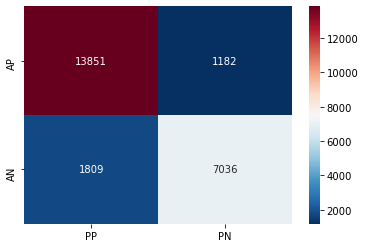

In [51]:
import seaborn as sns

y_pred = lgbmclf.predict(X_test)

print(f'Train(accuracy): {lgbmclf.score(X_train, y_train).round(5)}')
print(f'Test(accuracy): {lgbmclf.score(X_test, y_test).round(5)}\n')
print(metrics.classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test, y_pred), columns=['PP', 'PN'], index=['AP', 'AN'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdBu_r') # visualize confusion matrix with seaborn heatmap

## 3. XGBoost

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

Train(accuracy): 0.89579
Test(accuracy): 0.87729

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     15033
           1       0.85      0.81      0.83      8845

    accuracy                           0.88     23878
   macro avg       0.87      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878



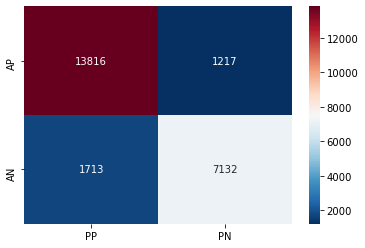

In [53]:
print(f'Train(accuracy): {xgb.score(X_train, y_train).round(5)}')
print(f'Test(accuracy): {xgb.score(X_test, y_test).round(5)}\n')
print(metrics.classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test, y_pred), columns=['PP', 'PN'], index=['AP', 'AN'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdBu_r') # visualize confusion matrix with seaborn heatmap

In [58]:
X_train.shape

(95512, 28)